In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
games = pd.read_csv('./data/results_pl.csv')
games.head()

,date,tournament,opponent,scored,conceded,is_home,neutral,city,country
0,1921-12-18,Friendly,Hungary,0,1,False,False,Budapest,Hungary
1,1922-05-14,Friendly,Hungary,0,3,True,False,Cracow,Poland
2,1922-05-28,Friendly,Sweden,2,1,False,False,Stockholm,Sweden
3,1922-09-03,Friendly,Romania,1,1,False,False,Cernăuţi,Romania
4,1922-10-01,Friendly,Yugoslavia,3,1,False,False,Zagreb,Yugoslavia


In [3]:
def points(row):
    if row['scored'] > row['conceded']:
        return 3
    elif row['scored'] == row['conceded']:
        return 1
    else:
        return 0

In [4]:
games['points'] = games.apply(points, axis=1)
games['decade'] = games.apply(lambda x: x['date'][:3]+'0', axis=1).astype('category')

In [5]:
to_drop = ['neutral','city','country']

games.drop(columns=to_drop, axis=1, inplace=True)
games.head()

,date,tournament,opponent,scored,conceded,is_home,points,decade
0,1921-12-18,Friendly,Hungary,0,1,False,0,1920
1,1922-05-14,Friendly,Hungary,0,3,True,0,1920
2,1922-05-28,Friendly,Sweden,2,1,False,3,1920
3,1922-09-03,Friendly,Romania,1,1,False,1,1920
4,1922-10-01,Friendly,Yugoslavia,3,1,False,3,1920


## Number of games by decades

In [6]:
decades = games.groupby('decade')
decades.size()

decade
1920     28
1930     51
1940     20
1950     47
1960     73
1970    107
1980    118
1990    120
2000    135
2010    116
dtype: int64

## Most common opponents by decades

In [7]:
for decade, data in decades:
    print(decade + ':' + data['opponent'].value_counts().index[0] + ' - ' + str(data['opponent'].value_counts()[0]))
    

1920:Sweden - 6
1930:Yugoslavia - 9
1940:Romania - 4
1950:Bulgaria - 7
1960:Bulgaria - 5
1970:Republic of Ireland - 7
1980:Romania - 6
1990:England - 8
2000:Wales - 5
2010:Republic of Ireland - 5


## Tournaments by decades:

In [8]:
for decade, data in decades:
    tour = data['tournament'].value_counts()
    print("\n"+decade+':')
    for i,v in tour.iteritems():
        print(i + ' - ' + str(v))


1920:
Friendly - 28

1930:
Friendly - 47
FIFA World Cup qualification - 3
FIFA World Cup - 1

1940:
Friendly - 15
Balkan Cup - 5

1950:
Friendly - 40
FIFA World Cup qualification - 5
UEFA Euro qualification - 2

1960:
Friendly - 51
FIFA World Cup qualification - 14
UEFA Euro qualification - 8

1970:
Friendly - 64
UEFA Euro qualification - 20
FIFA World Cup - 13
FIFA World Cup qualification - 10

1980:
Friendly - 73
FIFA World Cup qualification - 16
UEFA Euro qualification - 14
FIFA World Cup - 11
Nehru Cup - 4

1990:
Friendly - 75
UEFA Euro qualification - 23
FIFA World Cup qualification - 18
Cyprus International Tournament - 3
Lunar New Year Cup - 1

2000:
Friendly - 74
FIFA World Cup qualification - 30
UEFA Euro qualification - 22
FIFA World Cup - 6
UEFA Euro - 3

2010:
Friendly - 59
UEFA Euro qualification - 20
FIFA World Cup qualification - 20
UEFA Euro - 8
UEFA Nations League - 4
FIFA World Cup - 3
King's Cup - 2


## Performances by decades

In [9]:
results = decades.agg({'date':'count', 'scored':'sum', 'conceded':'sum', 'points':'sum'})
results.rename(columns={'date':'games'}, inplace=True)
results['ratio'] = round(results['points'] / results['games'],2)
results.sort_values('ratio', ascending=False)

,games,scored,conceded,points,ratio
decade,,,,,
1970,107,203,102,204,1.91
2010,116,197,118,200,1.72
2000,135,220,144,228,1.69
1980,118,172,141,184,1.56
1960,73,150,109,105,1.44
1990,120,146,156,170,1.42
1920,28,56,60,36,1.29
1930,51,121,119,64,1.25
1950,47,76,91,50,1.06


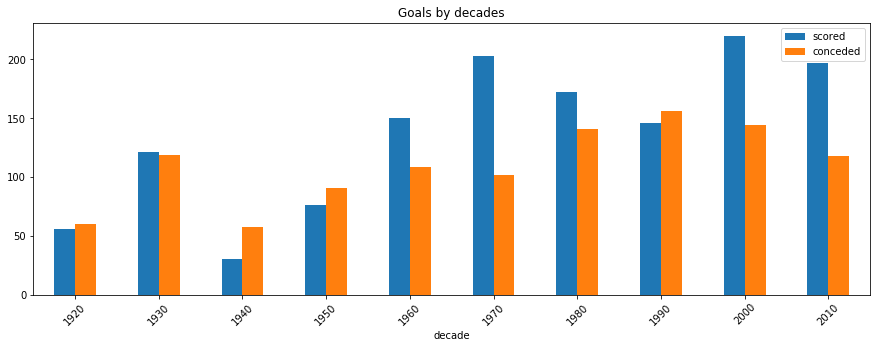

In [10]:
results[['scored','conceded']].plot(kind='bar', rot=45, figsize=(15,5), title='Goals by decades')

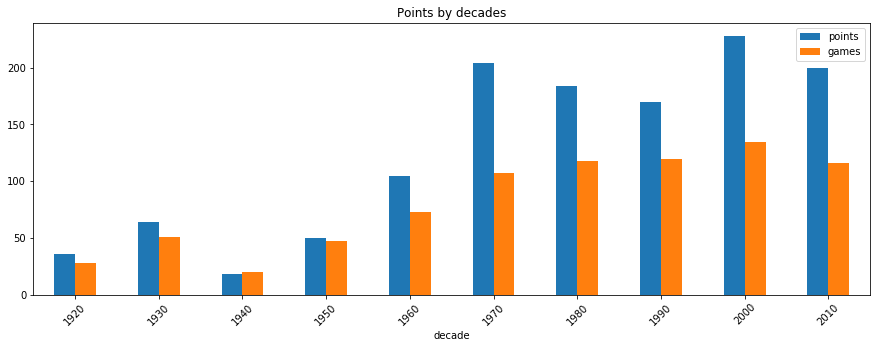

In [11]:
results[['points','games']].plot(kind='bar', rot=45, figsize=(15,5), title='Points by decades')

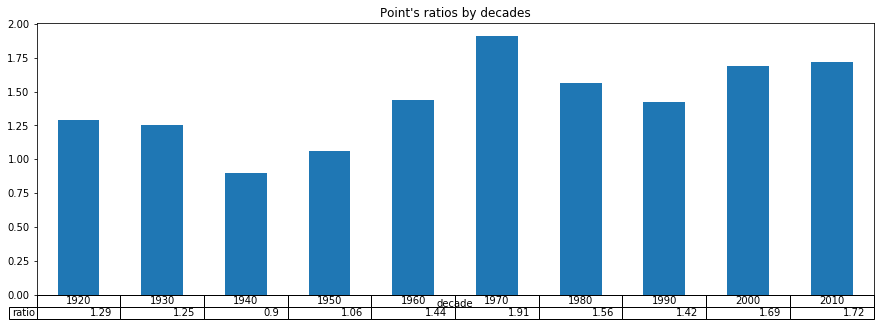

In [12]:
results['ratio'].plot(kind='bar', rot=45, figsize=(15,5), title='Point\'s ratios by decades', table=True, xticks=[])